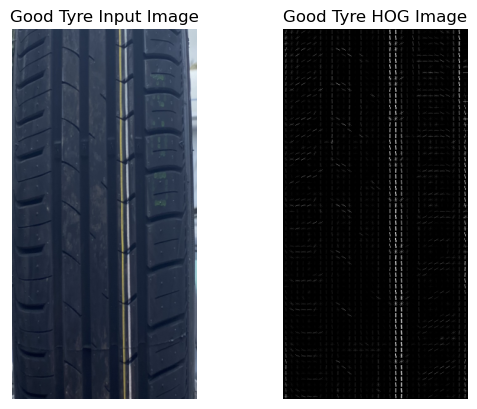

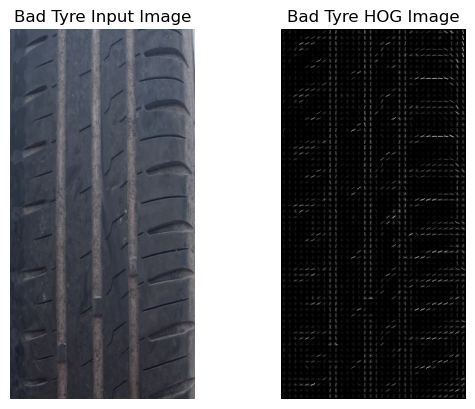

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Accuracy:  1.0


In [1]:
import numpy as np
import glob
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

def load_images(path, crop_size=(1200, 1200)):
    images = []
    for img_path in glob.glob(path):
        img = imread(img_path)

        # Calculate the center of the image
        center_y, center_x = img.shape[0] // 2, img.shape[1] // 2

        # Determine the size of the cropped region
        crop_height, crop_width = crop_size

        # Calculate the starting and ending coordinates of the cropped region
        start_y, end_y = center_y - crop_height // 2, center_y + crop_height // 2
        start_x, end_x = center_x - crop_width // 2, center_x + crop_width // 2

        # Crop the image
        cropped_img = img[start_y:end_y, start_x:end_x]

        images.append(cropped_img)
    return images

def extract_features(images, pixels_per_cell, cells_per_block):
    features = []
    resized_imgs = []
    for img in images:
        resized_img = resize(img, (128 * 4, 64 * 4))
        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
        features.append(fd)
        resized_imgs.append(resized_img)
    return np.array(features), resized_imgs, hog_image

def train_classifier(features, labels, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    return svm

# Load your dataset
# Assuming you have images of good and bad tyres in separate folders
good_tyres_path = "C:/Users/jonat/tyremate/good/*"
bad_tyres_path = "C:/Users/jonat/tyremate/bad/*"

good_tyres = load_images(good_tyres_path)
bad_tyres = load_images(bad_tyres_path)

def extract_features(images, pixels_per_cell, cells_per_block):
    features = []
    resized_imgs = []
    hog_images = []
    for img in images:
        resized_img = resize(img, (128 * 4, 64 * 4))
        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
        features.append(fd)
        resized_imgs.append(resized_img)
        hog_images.append(hog_image)
    return np.array(features), resized_imgs, hog_images

# Extract features
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

good_tyres_features, good_resized_imgs, good_hog_images = extract_features(good_tyres, pixels_per_cell, cells_per_block)
bad_tyres_features, bad_resized_imgs, bad_hog_images = extract_features(bad_tyres, pixels_per_cell, cells_per_block)

# Display an example input image and HOG image side by side for good tyres
example_idx = 4
fig, axes = plt.subplots(1, 2)
axes[0].axis("off")
axes[0].imshow(good_resized_imgs[example_idx])
axes[0].set_title("Good Tyre Input Image")

axes[1].axis("off")
axes[1].imshow(good_hog_images[example_idx], cmap="gray")
axes[1].set_title("Good Tyre HOG Image")

plt.show()

# Display an example input image and HOG image side by side for bad tyres
fig, axes = plt.subplots(1, 2)
axes[0].axis("off")
axes[0].imshow(bad_resized_imgs[example_idx])
axes[0].set_title("Bad Tyre Input Image")

axes[1].axis("off")
axes[1].imshow(bad_hog_images[example_idx], cmap="gray")
axes[1].set_title("Bad Tyre HOG Image")

plt.show()

# Combine the features and labels
features = np.vstack((good_tyres_features, bad_tyres_features))
labels = np.hstack((np.ones(len(good_tyres_features)), np.zeros(len(bad_tyres_features))))

# Train the classifier
svm = train_classifier(features, labels)


In [2]:
import numpy as np
import glob
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def load_images(path, crop_size=(1200, 1200)):
    images = []
    for img_path in glob.glob(path):
        img = imread(img_path)

        # Calculate the center of the image
        center_y, center_x = img.shape[0] // 2, img.shape[1] // 2

        # Determine the size of the cropped region
        crop_height, crop_width = crop_size

        # Calculate the starting and ending coordinates of the cropped region
        start_y, end_y = center_y - crop_height // 2, center_y + crop_height // 2
        start_x, end_x = center_x - crop_width // 2, center_x + crop_width // 2

        # Crop the image
        cropped_img = img[start_y:end_y, start_x:end_x]

        images.append(cropped_img)
    return images

def extract_features(images, pixels_per_cell, cells_per_block):
    features = []
    resized_imgs = []
    for img in images:
        resized_img = resize(img, (128 * 4, 64 * 4))
        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
        features.append(fd)
        resized_imgs.append(resized_img)
    return np.array(features), resized_imgs, hog_image

def train_classifier(features, labels, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    return svm

# Load your dataset
# Assuming you have images of good and bad tyres in separate folders
good_tyres_path = "C:/Users/jonat/tyremate/good/*"
bad_tyres_path = "C:/Users/jonat/tyremate/data/*"

good_tyres = load_images(good_tyres_path)
bad_tyres = load_images(bad_tyres_path)

def extract_features(images, pixels_per_cell, cells_per_block):
    features = []
    resized_imgs = []
    hog_images = []
    for img in images:
        resized_img = resize(img, (128 * 4, 64 * 4))
        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
        features.append(fd)
        resized_imgs.append(resized_img)
        hog_images.append(hog_image)
    return np.array(features), resized_imgs, hog_images

# Extract features
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

good_tyres_features, good_resized_imgs, good_hog_images = extract_features(good_tyres, pixels_per_cell, cells_per_block)
bad_tyres_features, bad_resized_imgs, bad_hog_images = extract_features(bad_tyres, pixels_per_cell, cells_per_block)


# Combine the features and labels
features = np.vstack((good_tyres_features, bad_tyres_features))
labels = np.hstack((np.ones(len(good_tyres_features)), np.zeros(len(bad_tyres_features))))

# Train the classifier
svm = train_classifier(features, labels)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        61
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

Accuracy:  1.0


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read and preprocess the test image
test_image_path = "C:/Users/jonat/tyremate/2.png"
test_images = load_images(test_image_path)

# Extract features from the test image
test_features, test_resized_imgs, test_hog_images = extract_features(test_images, pixels_per_cell, cells_per_block)

# Make a prediction using the trained classifier
test_prediction = svm.predict(test_features)

# Output the result
if test_prediction == 1:
    print("The test image is classified as a good tyre.")
else:
    print("The test image is classified as a bad tyre.")

# Display the test image
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

NameError: name 'load_images' is not defined

In [9]:
import tensorflow as tf
import glob
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def load_images(path, crop_size=(1200, 1200)):
    images = []
    for img_path in glob.glob(path):
        img = imread(img_path)

        # Calculate the center of the image
        center_y, center_x = img.shape[0] // 2, img.shape[1] // 2

        # Determine the size of the cropped region
        crop_height, crop_width = crop_size

        # Calculate the starting and ending coordinates of the cropped region
        start_y, end_y = center_y - crop_height // 2, center_y + crop_height // 2
        start_x, end_x = center_x - crop_width // 2, center_x + crop_width // 2

        # Crop the image
        cropped_img = img[start_y:end_y, start_x:end_x]

        images.append(cropped_img)
    return images

# Load your dataset (use the same good_tyres and bad_tyres lists as before)
good_tyres_path = "C:/Users/jonat/tyremate/good/*"
bad_tyres_path = "C:/Users/jonat/tyremate/data/*"

good_tyres = load_images(good_tyres_path)
bad_tyres = load_images(bad_tyres_path)

X = good_tyres + bad_tyres
y = [1] * len(good_tyres) + [0] * len(bad_tyres)

# Preprocess images
X = [preprocess_input(img) for img in X]
X = np.array(X)
y = np.array(y)  # Convert y to a NumPy array

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(1200, 1200, 3))

# Add a custom classifier on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Train only the top layers (freeze the base model layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classifier
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
6/6 [==============================] - 164s 21s/step - loss: 0.4998 - accuracy: 0.7068 - val_loss: 0.4007 - val_accuracy: 0.7349
Epoch 2/10
6/6 [==============================] - 150s 27s/step - loss: 0.3619 - accuracy: 0.7277 - val_loss: 0.3048 - val_accuracy: 0.7349
Epoch 3/10
6/6 [==============================] - 131s 23s/step - loss: 0.2689 - accuracy: 0.8482 - val_loss: 0.2189 - val_accuracy: 0.9880
Epoch 4/10
6/6 [==============================] - 128s 23s/step - loss: 0.1934 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 145s 26s/step - loss: 0.1495 - accuracy: 1.0000 - val_loss: 0.1251 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 136s 24s/step - loss: 0.1158 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 136s 24s/step - loss: 0.0914 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 1.0000
Epoch 8/10
6/6 [====

In [10]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("tyre_classifier.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\jonat\AppData\Local\Temp\tmp7wcsc8io\assets


INFO:tensorflow:Assets written to: C:\Users\jonat\AppData\Local\Temp\tmp7wcsc8io\assets


In [1]:
import tensorflow as tf
import glob
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

def load_images(path, crop_size=(1200, 1200)):
    images = []
    for img_path in glob.glob(path):
        img = imread(img_path)

        # Calculate the center of the image
        center_y, center_x = img.shape[0] // 2, img.shape[1] // 2

        # Determine the size of the cropped region
        crop_height, crop_width = crop_size

        # Calculate the starting and ending coordinates of the cropped region
        start_y, end_y = center_y - crop_height // 2, center_y + crop_height // 2
        start_x, end_x = center_x - crop_width // 2, center_x + crop_width // 2

        # Crop the image
        cropped_img = img[start_y:end_y, start_x:end_x]

        images.append(cropped_img)
    return images

# Load your dataset
good_tyres_path = "C:/Users/jonat/tyremate/good/*"
bad_tyres_path = "C:/Users/jonat/tyremate/data/*"

good_tyres = load_images(good_tyres_path)
bad_tyres = load_images(bad_tyres_path)

X = good_tyres + bad_tyres
y = [1] * len(good_tyres) + [0] * len(bad_tyres)

# Preprocess images
input_size = (224, 224)
X = [resize(img, input_size) for img in X]  # Resize images
X = [preprocess_input(img) for img in X]
X = np.array(X)
y = np.array(y)  # Convert y to a NumPy array

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_size + (3,))

# Add a custom classifier on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Train only the top layers (freeze the base model layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classifier
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
6/6 [==============================] - 15s 2s/step - loss: 0.6017 - accuracy: 0.7277 - val_loss: 0.5984 - val_accuracy: 0.7349
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.6021 - accuracy: 0.7277 - val_loss: 0.5792 - val_accuracy: 0.7349
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.5906 - accuracy: 0.7277 - val_loss: 0.5850 - val_accuracy: 0.7349
Epoch 4/10
6/6 [==============================] - 5s 895ms/step - loss: 0.5897 - accuracy: 0.7277 - val_loss: 0.5775 - val_accuracy: 0.7349
Epoch 5/10
6/6 [==============================] - 5s 893ms/step - loss: 0.5865 - accuracy: 0.7277 - val_loss: 0.5766 - val_accuracy: 0.7349
Epoch 6/10
6/6 [==============================] - 5s 898ms/step - loss: 0.5847 - accuracy: 0.7277 - val_loss: 0.5757 - val_accuracy: 0.7349
Epoch 7/10
6/6 [==============================] - 5s 892ms/step - loss: 0.5827 - accuracy: 0.7277 - val_loss: 0.5753 - val_accuracy: 0.7349
Epoch 8/10
6/6 [============